# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [23]:
import pandas as pd

In [24]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [26]:
from datetime import datetime as dt

In [27]:
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [28]:
apple = pd.read_csv('C:/Users/yoosha/Downloads/appl_1980_2014.csv',encoding ='cp1252')

### Step 3. Assign it to a variable apple

In [29]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [30]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [31]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [32]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [33]:
apple.set_index('Date').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [34]:
apple.duplicated('Date' , keep = 'first').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [35]:
apple.sort_values('Date', ascending = True).head()

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [39]:
l = pd.to_datetime(apple.Date)

In [41]:
l = apple.Date + pd.DateOffset(day = 1 ,months = 1, days = -1)

C:\Users\yoosha\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:743: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


In [52]:
apple['last_bus_day'] = pd.Series(np.where(l.dt.strftime('%A') == 'Saturday', l + pd.DateOffset(days = -1), 
np.where(l.dt.strftime('%A') == 'Sunday', l + pd.DateOffset(days = -2), l)))

In [54]:
apple['last_bus_day'] = apple['last_bus_day'].dt.strftime('%A')

In [55]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close,last_bus_day
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,Thursday
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,Thursday
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,Thursday
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,Thursday
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,Thursday
5,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93,Monday
6,2014-06-27,90.82,92.00,90.77,91.98,64006800,91.98,Monday
7,2014-06-26,90.37,91.05,89.80,90.90,32595800,90.90,Monday
8,2014-06-25,90.21,90.70,89.65,90.36,36852200,90.36,Monday
9,2014-06-24,90.75,91.74,90.19,90.28,38988300,90.28,Monday


### Step 10.  What is the difference in days between the first day and the oldest

In [47]:
First_date = min(apple['Date'])

In [49]:
last_date= max(apple['Date'])

In [50]:
Diff = last_date - First_date

In [51]:
Diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [15]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [16]:
pd.to_datetime(apple.Date , '%Y-%m-%d').head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [17]:
apple['Date'].dt.month.count()

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Figure size 972x648 with 0 Axes>

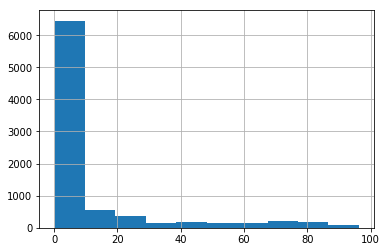

<Figure size 972x648 with 0 Axes>

In [54]:
apple['Adj Close'].hist()
plt.figure(figsize =(13.5 , 9))